# Exploratory Analysis of HAM10000

## Setup

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
# basic plot style setup
plt.style.use("default")
plt.rcParams.update({"figure.figsize": (8, 5), "axes.titlesize": 14, "axes.labelsize": 12})

In [19]:
# paths relative to exploratory_analysis/
root_dir = Path("..")
meta_csv = root_dir / "HAM10000_metadata.csv"
images_dir_1 = root_dir / "HAM10000_images_part_1"
images_dir_2 = root_dir / "HAM10000_images_part_2"

In [40]:
# load metadata
meta = pd.read_csv(meta_csv)
print("dataframe shape:", meta.shape)
meta.head()

dataframe shape: (10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [41]:
# show basic info
print("\n===== info =====")
meta.info()
print("\n===== describe (numerical only) =====")
print(meta.describe(include=["number"]))


===== info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB

===== describe (numerical only) =====
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


## Distributions

### Class Distribution (`dx`)

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


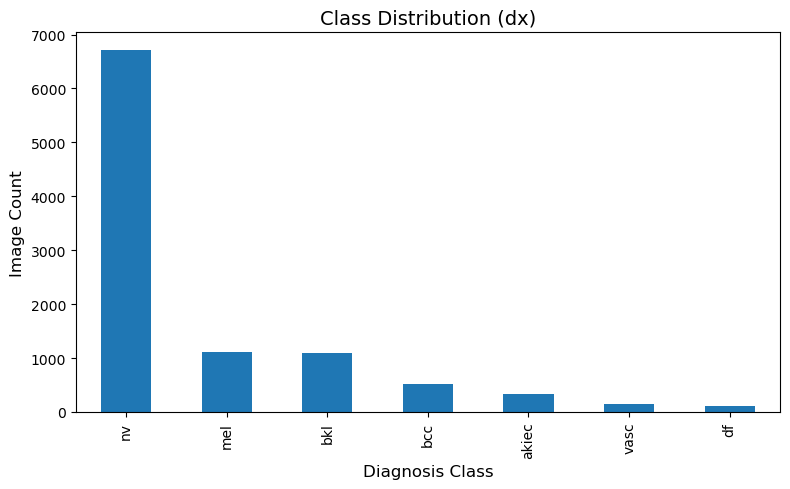

In [23]:
class_counts = meta["dx"].value_counts().sort_values(ascending=False)
print(class_counts)

class_counts.plot(kind="bar")
plt.title("Class Distribution (dx)")
plt.xlabel("Diagnosis Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

### Age Distribution (`age`)

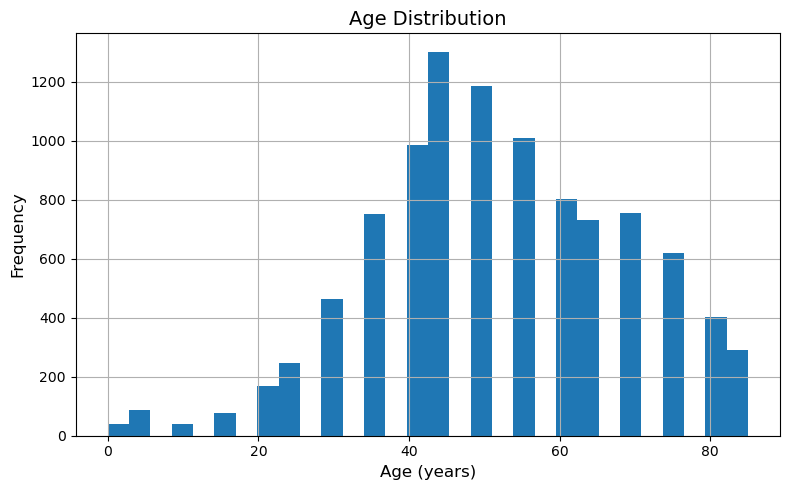

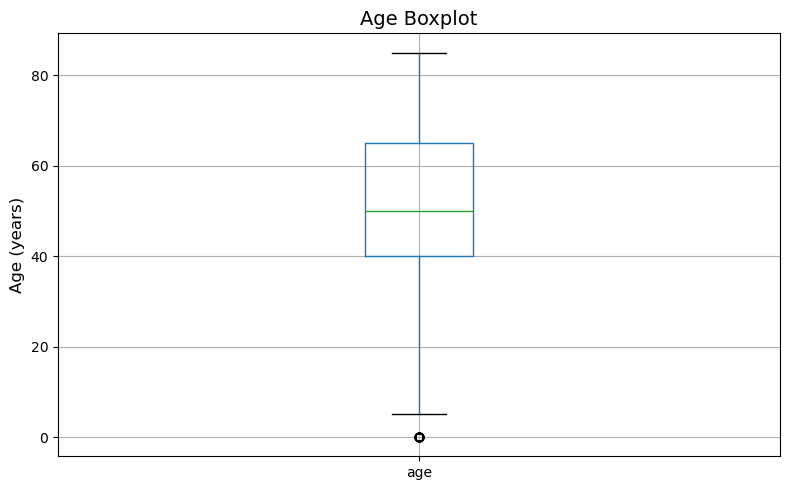

age statistics:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64


In [43]:
meta["age"].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

meta.boxplot(column="age")
plt.title("Age Boxplot")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()

print("age statistics:")
print(meta["age"].describe())

### Biological Sex Distribution (`sex`)

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


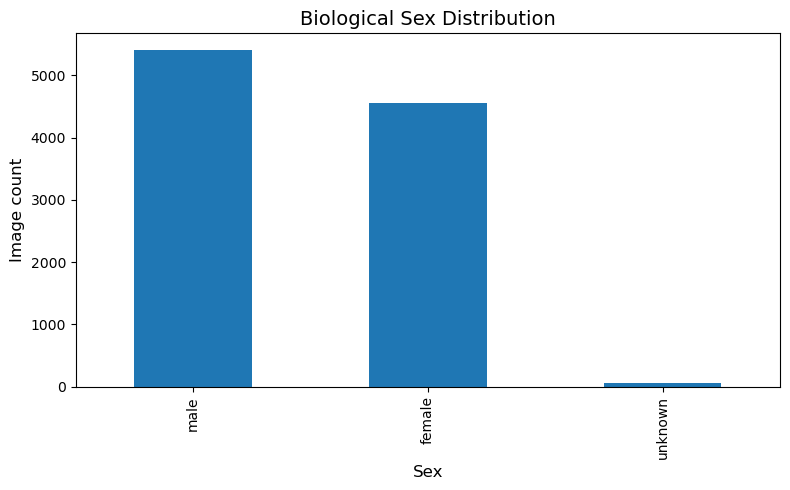

In [24]:
sex_counts = meta["sex"].value_counts()
print(sex_counts)

sex_counts.plot(kind="bar")
plt.title("Biological Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Image count")
plt.tight_layout()
plt.show()

### Anatomic Localization Distribution (`localization`)

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
Name: count, dtype: int64


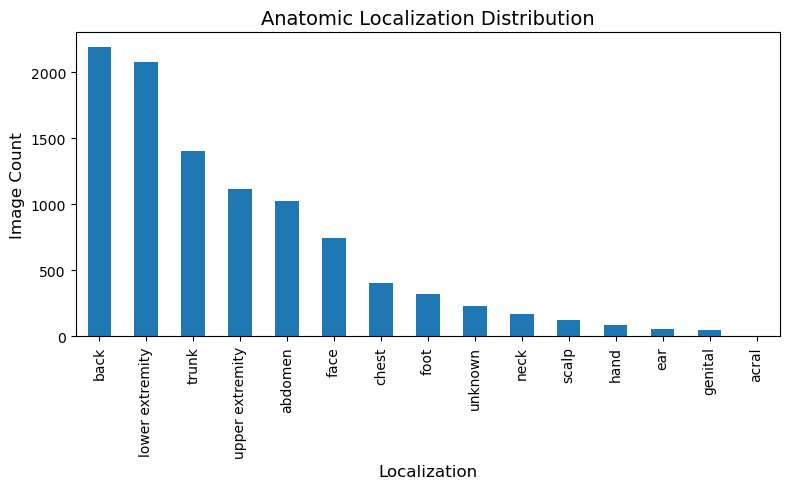

In [26]:
loc_counts = meta["localization"].value_counts().sort_values(ascending=False)
print(loc_counts.head(10))

loc_counts.plot(kind="bar")
plt.title("Anatomic Localization Distribution")
plt.xlabel("Localization")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

## Categorical Variable Relationship

### Class x Biological Sex

sex    female  male  unknown
dx                          
akiec     106   221        0
bcc       197   317        0
bkl       463   626       10
df         52    63        0
mel       424   689        0
nv       3237  3421       47
vasc       73    69        0


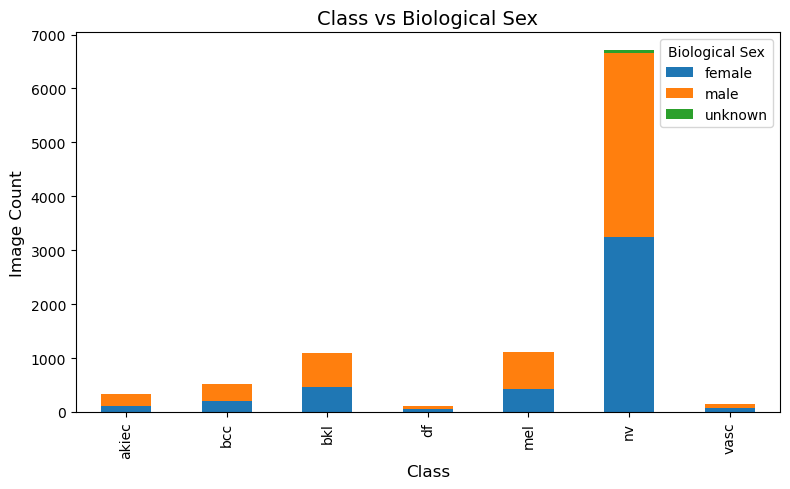

In [29]:
ct_dx_sex = pd.crosstab(meta["dx"], meta["sex"])
print(ct_dx_sex)

ct_dx_sex.plot(kind="bar", stacked=True)
plt.title("Class vs Biological Sex")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.legend(title="Biological Sex")
plt.tight_layout()
plt.show()

### Class x Top 3 Localization

localization  back  lower extremity  trunk
dx                                        
akiec           29               65      1
bcc            186               58     11
bkl            202              174     73
df               2               82      0
mel            324              192     47
nv            1427             1479   1241
vasc            22               27     31


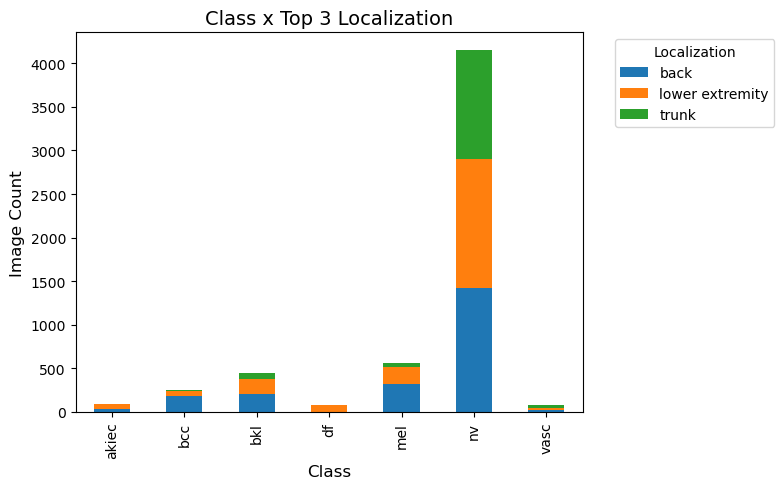

In [37]:
top_n = 3
top_localizations = loc_counts.head(top_n).index
subset = meta[meta["localization"].isin(top_localizations)]
ct_dx_loc = pd.crosstab(subset["dx"], subset["localization"])
print(ct_dx_loc)

ct_dx_loc.plot(kind="bar", stacked=True)
plt.title(f"Class x Top {top_n} Localization")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.legend(title="Localization", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Missing Values

age    57
dtype: int64


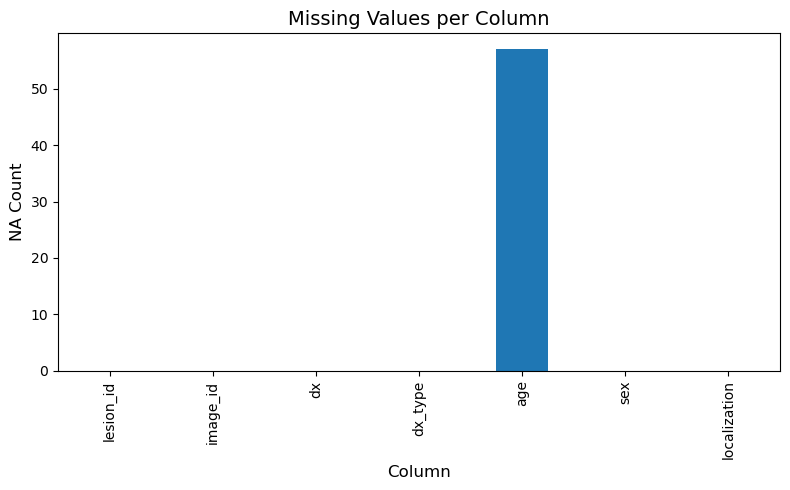

In [39]:
missing = meta.isnull().sum()
print(missing[missing > 0])

missing.plot(kind="bar")
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("NA Count")
plt.tight_layout()
plt.show()